In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
import math
import statistics
import operator
import matplotlib.pyplot as plt
import traitlets
from IPython.display import display
from ipywidgets import widgets
from tkinter import Tk, filedialog


class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectFilesButton, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "Select Files"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.
        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
my_button_1 = SelectFilesButton()
my_button_1


SelectFilesButton(description='Select Files', icon='square-o', style=ButtonStyle(button_color='orange'))

In [4]:
main_dict = pd.read_csv(my_button_1.files[0]).loc[ : , ["Input.text","Answer.Label", "Answer.Severity", "Answer.isStress"]]

In [5]:
counts_dictionary = {}
for label in main_dict['Answer.Label'].tolist():
    if '|' in label:
        if label not in counts_dictionary:
            counts_dictionary[label] = 0
        counts_dictionary[label] += 1

In [19]:
dictionary_items = counts_dictionary.items()

dict_tuples = sorted([item for item in counts_dictionary.items()], key=lambda item: item[1], reverse=True)

TypeError: 'dict_items' object is not subscriptable

In [14]:
dict_tuples

[('Work|Financial Problem', 408),
 ('Work|Social Relationships', 238),
 ('Emotional Turmoil|Social Relationships', 168),
 ('Work|School', 152),
 ('Social Relationships|Family Issues', 140),
 ('Emotional Turmoil|Family Issues', 137),
 ('Family Issues|Health, Fatigue, or Physical Pain', 129),
 ('Work|Emotional Turmoil', 123),
 ('Work|Health, Fatigue, or Physical Pain', 96),
 ('Work|Everyday Decision Making', 93),
 ('Emotional Turmoil|Health, Fatigue, or Physical Pain', 90),
 ('Financial Problem|Emotional Turmoil', 88),
 ('Everyday Decision Making|Other', 83),
 ('Financial Problem|Family Issues', 82),
 ('Work|Family Issues', 81),
 ('Financial Problem|Everyday Decision Making', 77),
 ('Financial Problem|Other', 63),
 ('Emotional Turmoil|Everyday Decision Making', 53),
 ('Financial Problem|Health, Fatigue, or Physical Pain', 49),
 ('Health, Fatigue, or Physical Pain|Everyday Decision Making', 46),
 ('School|Financial Problem', 39),
 ('Family Issues|Everyday Decision Making', 39),
 ('Social 

In [7]:
sortednew_dict = {}
for pair in dict_tuples:
    sortednew_dict[pair[0]] = pair[1]

In [8]:
new_dict = {'stressor': [], 'count': []}
for label in sortednew_dict:
    new_dict['stressor'].append(label)
    new_dict['count'].append(counts_dictionary[label])

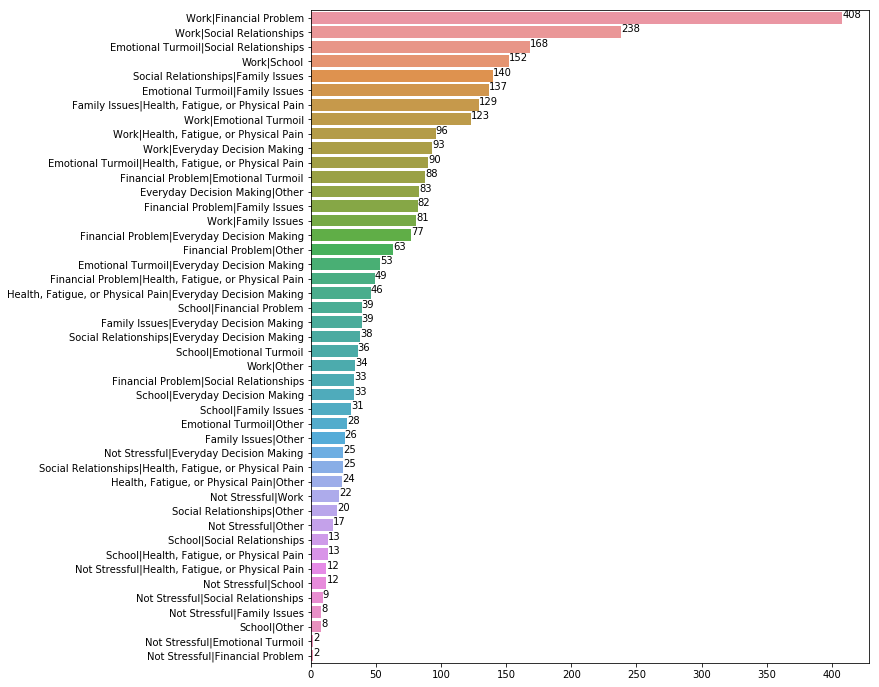

In [9]:
values = list(sortednew_dict.values())
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=new_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

In [12]:
main_label_list = []
for main_label in counts_dictionary:
    first_label, second = main_label.split('|')
    label_list = []
    for label in counts_dictionary:
        label1, label2 = label.split('|')
        if label1 == first_label:
            label_list.append(label)
    main_label_list.append(label_list)
print(main_label_list[:5])

[['Work|Everyday Decision Making', 'Work|Other', 'Work|School', 'Work|Family Issues', 'Work|Social Relationships', 'Work|Health, Fatigue, or Physical Pain', 'Work|Financial Problem', 'Work|Emotional Turmoil'], ['Work|Everyday Decision Making', 'Work|Other', 'Work|School', 'Work|Family Issues', 'Work|Social Relationships', 'Work|Health, Fatigue, or Physical Pain', 'Work|Financial Problem', 'Work|Emotional Turmoil'], ['Social Relationships|Everyday Decision Making', 'Social Relationships|Family Issues', 'Social Relationships|Health, Fatigue, or Physical Pain', 'Social Relationships|Other'], ['Everyday Decision Making|Other'], ['Financial Problem|Other', 'Financial Problem|Emotional Turmoil', 'Financial Problem|Everyday Decision Making', 'Financial Problem|Family Issues', 'Financial Problem|Social Relationships', 'Financial Problem|Health, Fatigue, or Physical Pain']]


In [17]:
# making another dictionary
grouped_dict = {}
for labelSets in main_label_list:
    for label in labelSets:
        grouped_dict[label] = counts_dictionary[label]
print(grouped_dict)

{'Work|Everyday Decision Making': 93, 'Work|Other': 34, 'Work|School': 152, 'Work|Family Issues': 81, 'Work|Social Relationships': 238, 'Work|Health, Fatigue, or Physical Pain': 96, 'Work|Financial Problem': 408, 'Work|Emotional Turmoil': 123, 'Social Relationships|Everyday Decision Making': 38, 'Social Relationships|Family Issues': 140, 'Social Relationships|Health, Fatigue, or Physical Pain': 25, 'Social Relationships|Other': 20, 'Everyday Decision Making|Other': 83, 'Financial Problem|Other': 63, 'Financial Problem|Emotional Turmoil': 88, 'Financial Problem|Everyday Decision Making': 77, 'Financial Problem|Family Issues': 82, 'Financial Problem|Social Relationships': 33, 'Financial Problem|Health, Fatigue, or Physical Pain': 49, 'Emotional Turmoil|Other': 28, 'Emotional Turmoil|Everyday Decision Making': 53, 'Emotional Turmoil|Family Issues': 137, 'Emotional Turmoil|Social Relationships': 168, 'Emotional Turmoil|Health, Fatigue, or Physical Pain': 90, 'School|Financial Problem': 39,

In [13]:
new_dict = {'stressor': [], 'count': []}
for label_set in main_label_list:
    for label in label_set:
        new_dict['stressor'].append(label)
        new_dict['count'].append(counts_dictionary[label])
print(new_dict)

{'stressor': ['Work|Everyday Decision Making', 'Work|Other', 'Work|School', 'Work|Family Issues', 'Work|Social Relationships', 'Work|Health, Fatigue, or Physical Pain', 'Work|Financial Problem', 'Work|Emotional Turmoil', 'Work|Everyday Decision Making', 'Work|Other', 'Work|School', 'Work|Family Issues', 'Work|Social Relationships', 'Work|Health, Fatigue, or Physical Pain', 'Work|Financial Problem', 'Work|Emotional Turmoil', 'Social Relationships|Everyday Decision Making', 'Social Relationships|Family Issues', 'Social Relationships|Health, Fatigue, or Physical Pain', 'Social Relationships|Other', 'Everyday Decision Making|Other', 'Financial Problem|Other', 'Financial Problem|Emotional Turmoil', 'Financial Problem|Everyday Decision Making', 'Financial Problem|Family Issues', 'Financial Problem|Social Relationships', 'Financial Problem|Health, Fatigue, or Physical Pain', 'Emotional Turmoil|Other', 'Emotional Turmoil|Everyday Decision Making', 'Emotional Turmoil|Family Issues', 'Emotional 

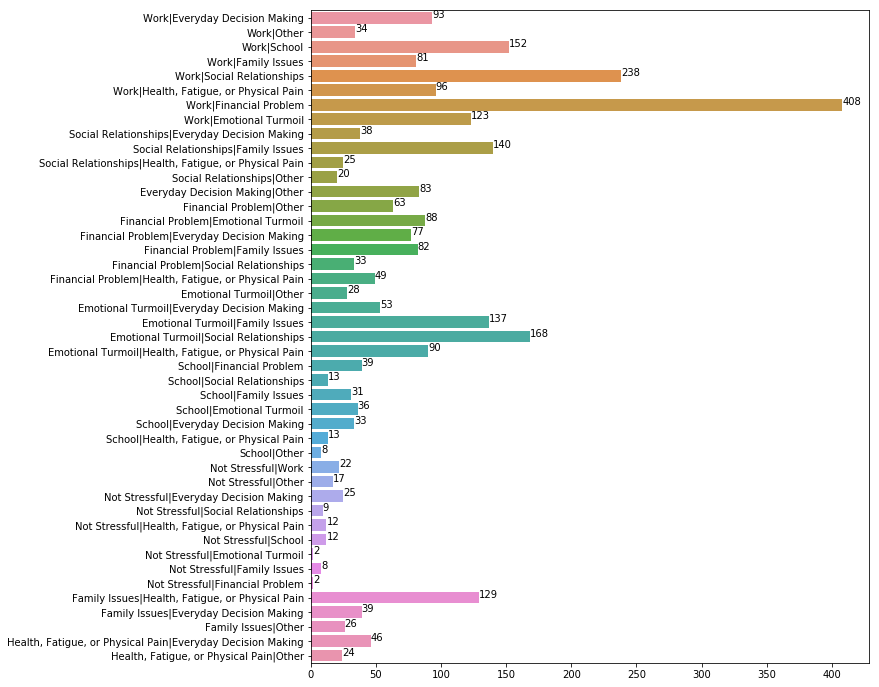

In [18]:
values = list(grouped_dict.values())
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=new_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

In [73]:
ordered_tuples = []
seen = []
flag = False
for label in counts_dictionary:
    label_main, label_sec = label.split('|')
    temporary_dict = {}
    for label_want in counts_dictionary:
        first, second = label_want.split('|')
        if (label_main == first) and (label_want not in seen):
            seen.append(label_want)
            temporary_dict[label_want] = counts_dictionary[label_want]
    dict_tuples = sorted([item for item in temporary_dict.items()], key=lambda item: item[1], reverse=True)
    ordered_tuples.extend(dict_tuples)
sortednew_dict = {}
for pair in ordered_tuples:
    sortednew_dict[pair[0]] = pair[1]
new_dict = {'stressor': [], 'count': []}
for label in sortednew_dict:
    new_dict['stressor'].append(label)
    new_dict['count'].append(counts_dictionary[label])
print((new_dict['stressor']))

['Work|Financial Problem', 'Work|Social Relationships', 'Work|School', 'Work|Emotional Turmoil', 'Work|Health, Fatigue, or Physical Pain', 'Work|Everyday Decision Making', 'Work|Family Issues', 'Work|Other', 'Social Relationships|Family Issues', 'Social Relationships|Everyday Decision Making', 'Social Relationships|Health, Fatigue, or Physical Pain', 'Social Relationships|Other', 'Everyday Decision Making|Other', 'Financial Problem|Emotional Turmoil', 'Financial Problem|Family Issues', 'Financial Problem|Everyday Decision Making', 'Financial Problem|Other', 'Financial Problem|Health, Fatigue, or Physical Pain', 'Financial Problem|Social Relationships', 'Emotional Turmoil|Social Relationships', 'Emotional Turmoil|Family Issues', 'Emotional Turmoil|Health, Fatigue, or Physical Pain', 'Emotional Turmoil|Everyday Decision Making', 'Emotional Turmoil|Other', 'School|Financial Problem', 'School|Emotional Turmoil', 'School|Everyday Decision Making', 'School|Family Issues', 'School|Social Rela

In [23]:
a = [1, 2, 3]
if 4 in a:
    print(True)

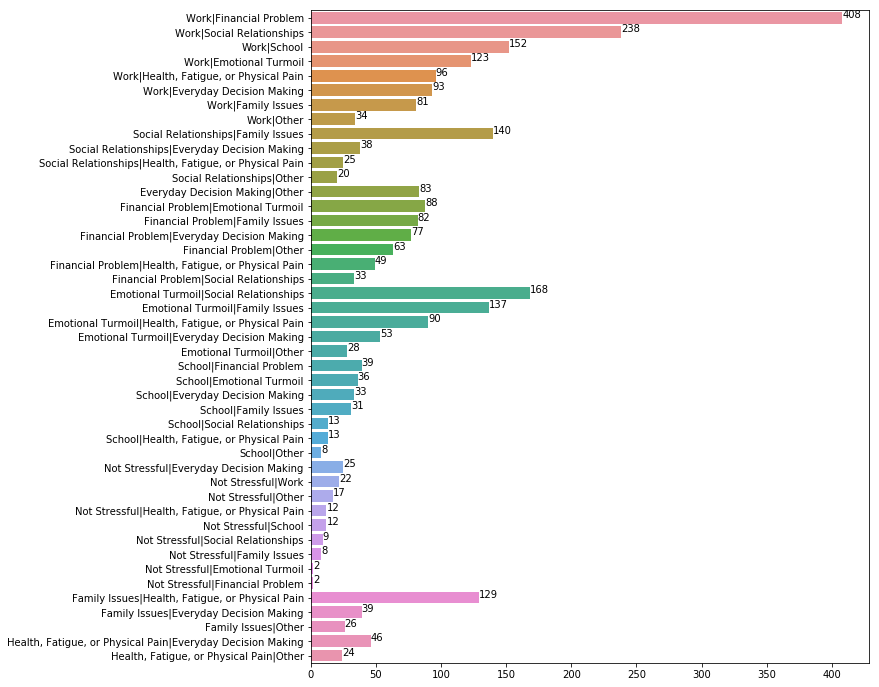

In [74]:
values = new_dict['count']
plt.subplots(figsize = (10,12))
sns.barplot(x='count', y='stressor', data=new_dict)
for index, value in enumerate(values):
        plt.text(value, index, str(value))

In [ ]:
ordered_tuples = []
seen = []
flag = False
for label in counts_dictionary:
    label_main, label_sec = label.split('|')
    temporary_dict = {}
    for label_want in counts_dictionary:
        first, second = label_want.split('|')
        if (label_main == first) and (label_want not in seen):
            flag = True
            seen.append(label_want)
            temporary_dict[label_want] = counts_dictionary[label_want]
    dict_tuples = sorted([item for item in temporary_dict.items()], key=lambda item: item[1], reverse=True)
    if (flag == True):
        dict_tuples.append((' ', 0))
    ordered_tuples.extend(dict_tuples)
    flag=False
sortednew_dict = {}
blank = '_'
for pair in ordered_tuples:
    sortednew_dict[blank] = pair[1]
    sortednew_dict[pair[0]] = pair[1]
new_dict = {'stressor': [], 'count': []}
for label in sortednew_dict:
    if '_' in label:
        new_dict['stressor'].append('')
        new_dict['count'].append(0)
        continue
    new_dict['stressor'].append(label)
    new_dict['count'].append(counts_dictionary[label])
print((new_dict['stressor']))